In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import tensorflow as tf
import ARIMA as ARIMA

In [4]:
class data_handler():

    def __init__(self,path,step):
        self.path = path
        self.step = step
        
    def get_data(self): 
        data = np.asarray(pd.read_csv(self.path))
        open_closed_price = np.reshape(np.concatenate((data[:,1],data[:,2]),axis=0),(2,len(data[:,1])))
        open_price = np.mean(open_closed_price,axis=0)
        open_price = open_price[:int(len(open_price)/self.step)*self.step]
        return open_price

forecast_horizon = 8
handler = data_handler(path = 'Data/Stocks/utx.us.txt',step = forecast_horizon)
data = handler.get_data()

In [7]:
wallet = 1000
backtest_from = int(len(data)*0.9)

mod = ARIMA.model(forecast_horizon=forecast_horizon,backtest_from = backtest_from)
mod.get_optimal_parameters(data)
new_wallet = mod.backtest(data,wallet)

percentage_return = ((new_wallet-wallet)/wallet)*100
print("Backtested profit in",len(data)-backtest_from,"days is £",round(new_wallet-wallet,2),"."," Percentage return is",round(percentage_return,2),"%")

c:\users\ellio\documents\miniconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\ellio\documents\miniconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\ellio\documents\miniconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\ellio\documents\miniconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\ellio\documents\miniconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood opti

Model parameters optimised.
Backtesting in progress...
Backtesting complete
Backtested profit in 1208 days is £ 537.92 .  Percentage return is 53.79 %


Backtested profit in 1208 days is £ 537.92 .  Percentage return is 53.79 %
Percentage change in 8 days is: 0.0 %.
Percentage change in 16 days is: -0.24 %.
Percentage change in 24 days is: 0.23 %.
Percentage change in 32 days is: 1.34 %.


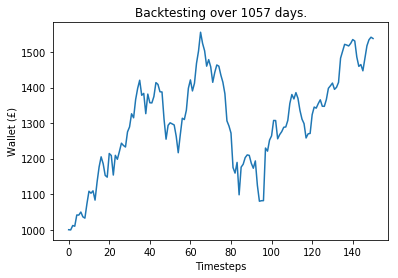

In [36]:
plt.plot(mod.wallet_change)
plt.xlabel("Timesteps")
plt.ylabel("Wallet (£)")
plt.title("Backtesting over "+str(len(mod.wallet_change)*7)+" days.")
locations = [1,2,3,4]
print("Backtested profit in",(len(mod.wallet_change)*forecast_horizon),"days is £",round(new_wallet-wallet,2),"."," Percentage return is",round(percentage_return,2),"%")


def change(locations,wallet_change):
    percentage_change = []
    final = wallet_change[-1]

        
    for loc in locations:
        initial = wallet_change[len(wallet_change)-loc]
        value = ((final-initial)/initial)*100
        percentage_change = np.append(percentage_change,value)
    
    return percentage_change

percentage_change = change(locations,mod.wallet_change)

for loc in range(len(percentage_change)):
    print("Percentage change in",locations[loc]*forecast_horizon,"days is:",round(percentage_change[loc],2),"%.")

